<p align = "center" draggable=”false” ><img src="https://user-images.githubusercontent.com/37101144/161836199-fdb0219d-0361-4988-bf26-48b0fad160a3.png" 
     width="200px"
     height="auto"/>
</p>

# 🛍️ Launch New Products

Today you are a machine learning engineer at the Department of New Products at Target Cosmetics! 

We will start with a small dataset on interactions between users and current products from the past and try to discover substructure, if there's any, by applying some **unsupervised learning** methods. 

Then we will leverage the small amount of labeled data (current products) in combination with a larger amount of unlabeled data (new products to launch) to make estimations as to which products will sell more. 

## 📚 Learning Objectives

By the end of this session, you will be able to:

- apply dimensionality reduction techniques to reduce features to a lower dimensional space
- perform customer segmentation, determine optional number of clusters, and understand assumptions for used algorithm
- understand what semi-supervised learning is and leverage it to improve performance of supervised learning

## Task 1. Dimensionality Reduction

1. Load in the data. 
    
    Import `pandas` as `pd` and use `pd.read_csv()` to read in `past.csv.gz` in the `dat` folder, saving it as `past`. 
    
    Data in `past.csv.gz` was propcessed; e.g., features indicating time of day, day of week, month, and year of the purchase have been converted to one-hot representations of these categories. 

In [2]:
# YOUR CODE HERE
import pandas as pd
past = pd.read_csv('../dat/past.csv.gz')
past.columns

Index(['product_id', 'user_id', 'NumOfEventsInJourney', 'NumSessions',
       'interactionTime', 'maxPrice', 'minPrice', 'NumCart', 'NumView',
       'NumRemove', 'InsessionCart', 'InsessionView', 'InsessionRemove',
       'Weekend', 'Fr', 'Mon', 'Sat', 'Sun', 'Thu', 'Tue', 'Wed', '2019',
       '2020', 'Jan', 'Feb', 'Oct', 'Nov', 'Dec', 'Afternoon', 'Dawn',
       'EarlyMorning', 'Evening', 'Morning', 'Night', 'Purchased?', 'Noon',
       'Category'],
      dtype='object')

<details>
<summary> Expected output </summary>

```
Index(['product_id', 'user_id', 'NumOfEventsInJourney', 'NumSessions',
       'interactionTime', 'maxPrice', 'minPrice', 'NumCart', 'NumView',
       'NumRemove', 'InsessionCart', 'InsessionView', 'InsessionRemove',
       'Weekend', 'Fr', 'Mon', 'Sat', 'Sun', 'Thu', 'Tue', 'Wed', '2019',
       '2020', 'Jan', 'Feb', 'Oct', 'Nov', 'Dec', 'Afternoon', 'Dawn',
       'EarlyMorning', 'Evening', 'Morning', 'Night', 'Purchased?', 'Noon',
       'Category'],
      dtype='object')
```
</details>

2. What percentage of the interactions (rows) resulted in a purchase?

    Do people mostly buy what they look at or do they do a lot of "window shopping" (shopping around without buying)?
    
    From the perspective of classification, is the data balanced?

In [11]:
# YOUR CODE HERE
print(f"{len(past[past['Purchased?'] == 1]) / len(past) * 100}%")

34.38%


3. Drop `product_id` and `user_id` and save the rest columns to a new `pd.DataFrame`:`X`; then pop the column `'Purchased?'` and save it to `y`.

In [6]:
# YOUR CODE HERE
X = past.drop(labels=['product_id', 'user_id'], axis=1)
# YOUR CODE HERE
y = X.pop('Purchased?')

In [7]:
assert X.shape == (5000, 34)
assert y.shape == (5000,)

4. Apply [PCA (check documentation if unfamiliar)](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) to reduce the number of features down to **5**, save it to a numpy array named `X_reduced`. 

    Do you need to preprocess the data before performing PCA? Quick review [here: Importance of feature scaling](https://scikit-learn.org/stable/auto_examples/preprocessing/plot_scaling_importance.html).
    
    If time permits, read [Does mean centering or feature scaling affect a Principal Component Analysis?](https://sebastianraschka.com/faq/docs/pca-scaling.html) or [discussion 1](https://stats.stackexchange.com/questions/53/pca-on-correlation-or-covariance).

In [8]:
# YOUR CODE HERE
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

std_pca = make_pipeline(StandardScaler(), PCA(n_components=5))
X_reduced = std_pca.fit_transform(X)

In [9]:
assert X_reduced.shape == (5000, 5)

5. Print out the percentage of variance explained by each of the selected components.

In [15]:
# YOUR CODE HERE
pca = std_pca.named_steps['pca']
pca.explained_variance_ratio_

array([0.10282214, 0.09445336, 0.06507031, 0.05116112, 0.04213014])

6. Review code in functions `visualize_2pcs` and `visualize_3pcs` below and visualize first few principal components in 2D and 3D plots, respectively:

In [16]:
import matplotlib.pyplot as plt

def visualize_2pcs(pcs, y):
    fig, ax = plt.subplots()
    plot = plt.scatter(pcs[:,0], pcs[:,1], c=y) 
    ax.legend(
        handles=plot.legend_elements()[0], 
        labels=['No', 'Yes'])

In [17]:
def visualize_3pcs(pcs, y):
    fig, ax = plt.subplots()
    ax = fig.add_subplot(projection='3d')
    plot = ax.scatter(pcs[:,0], pcs[:,1], pcs[:,2], c=y)
    ax.legend(
        handles=plot.legend_elements()[0], 
        labels=['No', 'Yes'])

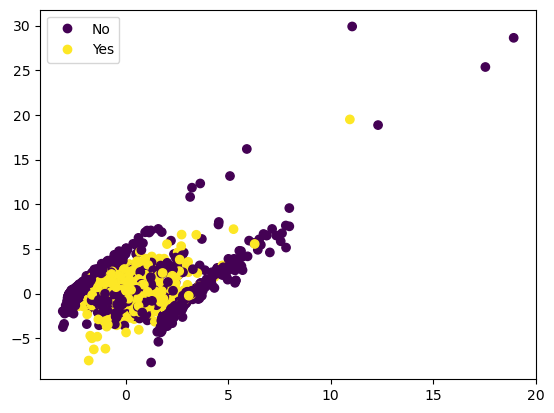

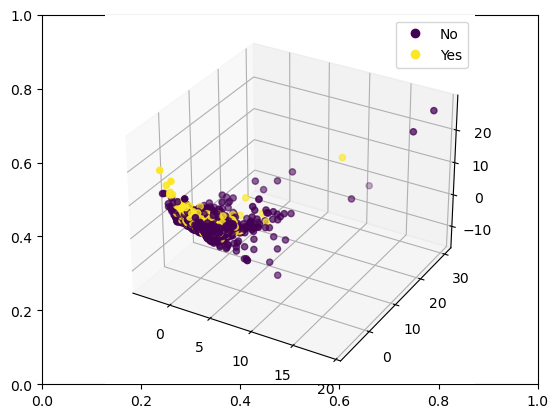

In [18]:
# YOUR CODE HERE
visualize_2pcs(X_reduced, y)
# YOUR CODE HERE
visualize_3pcs(X_reduced, y)

7. One way to assess the quality of the dimensionality reduction, when the groundtruth is available of course, is comparing the prediction performance using given features vs reduced (engineered) features.

    Complete the wrapper function below that 

    - takes features, target, and a boolean parameter indicating whether to include standardization in the pipeline or not
    - split the data into train (80%) and test (20%) datasets, set the random state for spliting at 0
    - build a pipeline that 

        1) preprocessing data using standardization if the `standardize` is `True`; otherwise skip this step  

        2) apply logistic regression ( are the labels balanced? )
        
    - fit the pipeline using training data
    - print the classification report (use `sklearn.metrics.classification_report`) on test data

In [19]:
# YOUR CODE HERE (imports!)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

def train(X, y, standardize = True) -> None:
    # YOUR CODE HERE
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
    if standardize:
        lr = make_pipeline(StandardScaler(), LogisticRegression(class_weight='balanced'))
    else:
        lr = make_pipeline(LogisticRegression(class_weight='balanced'))
    lr.fit(X_train, y_train)
    print(classification_report(y_test, lr.predict(X_test)))

Now apply the pipeline on the all the features `X` and review the performance

In [20]:
# YOUR CODE HERE
train(X, y)

              precision    recall  f1-score   support

           0       0.75      0.77      0.76       649
           1       0.55      0.52      0.54       351

    accuracy                           0.68      1000
   macro avg       0.65      0.65      0.65      1000
weighted avg       0.68      0.68      0.68      1000



Similarly, apply the pipeline on the reduced / engineered features `X_reduced`. Should you include standardization in the pipeline?

In [21]:
# YOUR CODE HERE
train(X_reduced, y, standardize=False)

              precision    recall  f1-score   support

           0       0.74      0.72      0.73       649
           1       0.51      0.54      0.52       351

    accuracy                           0.66      1000
   macro avg       0.63      0.63      0.63      1000
weighted avg       0.66      0.66      0.66      1000



8. Are the results as expected? Discuss the pros and cons using reduced set of features in this application with your teammate. 
    **The results are roughly the same, or slightly better, when we use the full set of features compared to using the reduced set. The pros of using a reduced set include easier visualization, fast computation, and less likelihood of overfitting. The cons are that we may be losing import information when we select a small number of principal components.**

## Task 2. Customer Segmentation

In this task, we apply k-means clustering on the reduced data, experimenting different vaules of `n_cluster`, summarize all this information in a single plot, the *Elbow* plot. In addition, leverage silhouette visualization to help decide the "optimal" number of clusters in our data and answer: 

1. Are there any patterns among customer purchasing behaviors?
2. If so, what categories do they belong to? How do you characterize the clusters?
3. If not, what followup steps and / or recommendations will you make as an MLE?

1. Look up the [documentation](https://scikit-learn.org/stable/modules/clustering.html) and import the model class for k-means from `sklearn.cluster`

In [22]:
# YOUR CODE HERE
from sklearn.cluster import KMeans

2. Complete `visualize_elbow`; inspect the code and complete

    - fit k-means on the given data `X` and `k`, setting `random_state` to be 10 for reproducibility
    - append the sum of squared distances of samples to their closest cluster center for each $k$ to list `inertias`

In [23]:
def visualize_elbow(X, ks):
    fig, ax = plt.subplots()
    inertias = []
    for k in ks:
        # YOUR CODE HERE
        kmeans = KMeans(n_clusters=k, random_state=10)
        # YOUR CODE HERE
        inertias.append(kmeans.fit(X).inertia_)
    plt.plot(ks, inertias)
    plt.xticks(ks)
    plt.xlabel('Number of clusters')
    plt.ylabel('Inertia')
    plt.title('Elbow plot')

3. Visualize the elbow plot for the number of clusters ranging between 2 and 9. Discuss with your teammate, what is the 'optimal' number of clusters?

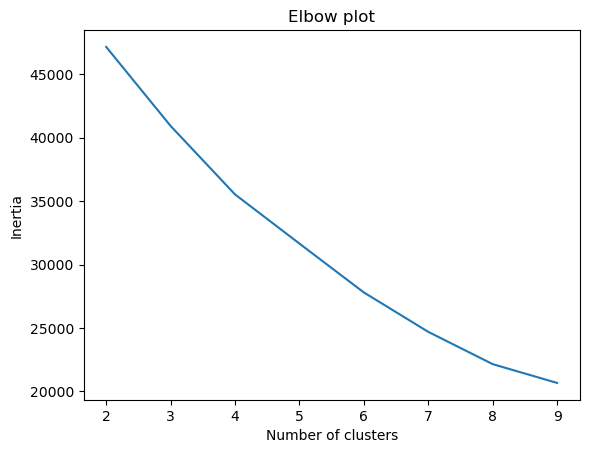

In [24]:
# YOUR CODE HERE
visualize_elbow(X_reduced, range(2, 10))

4. What are the disadvantage to use the Elbow method? 

    The disadvantage of the elbow method is that it cannot be unambiguously defined, especially when the curve is relatively smooth in appearance.

5. Let's try a different approach: [silhouette score](https://towardsdatascience.com/clustering-metrics-better-than-the-elbow-method-6926e1f723a6).

    A helper function `visualize_silhouette` is provided for you (inspect the code in `utils.py`) and figure out how to use it to visualize k-means for k ranges from 2 to 8 on the reduced data. 

In [26]:
from utils import visualize_silhouette

For n_clusters = 2 The average silhouette_score is : 0.24963875291569376
For n_clusters = 3 The average silhouette_score is : 0.25759351501568173
For n_clusters = 4 The average silhouette_score is : 0.27119833290906437
For n_clusters = 5 The average silhouette_score is : 0.3008889629173973
For n_clusters = 6 The average silhouette_score is : 0.24159310033272446
For n_clusters = 7 The average silhouette_score is : 0.24797603541738067
For n_clusters = 8 The average silhouette_score is : 0.2640896112055591


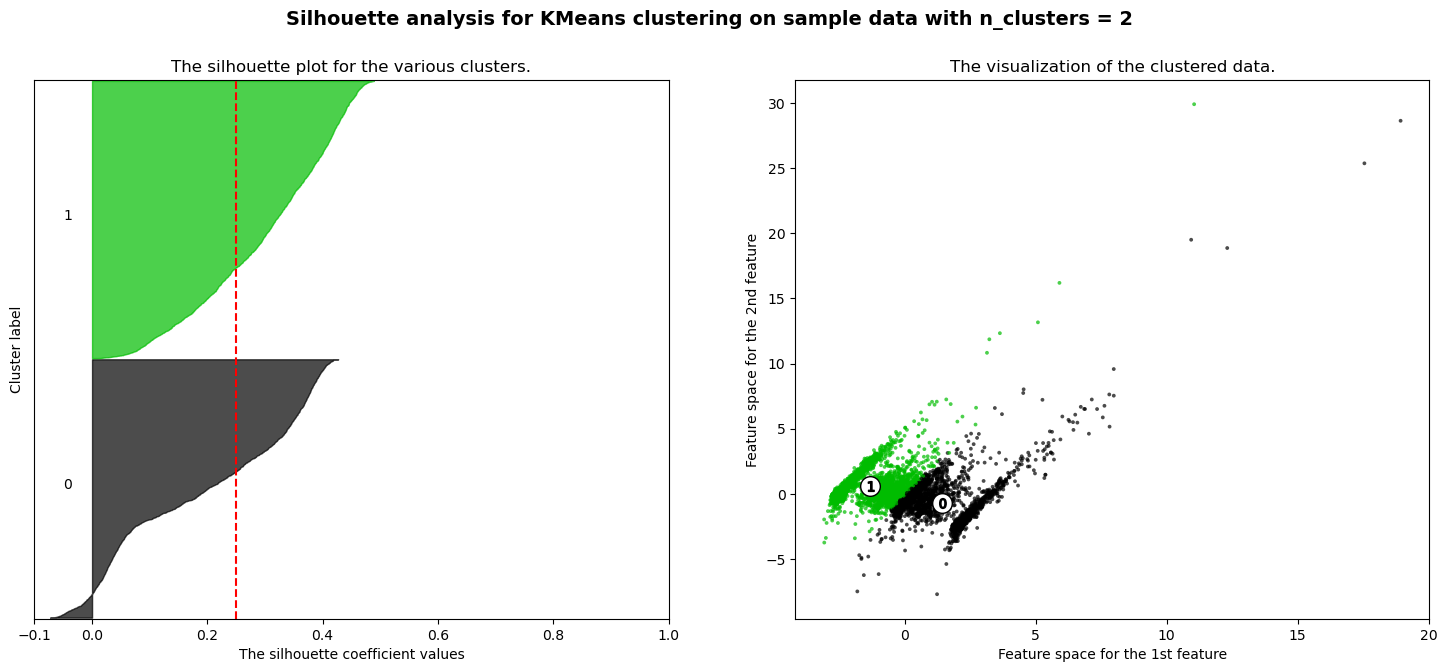

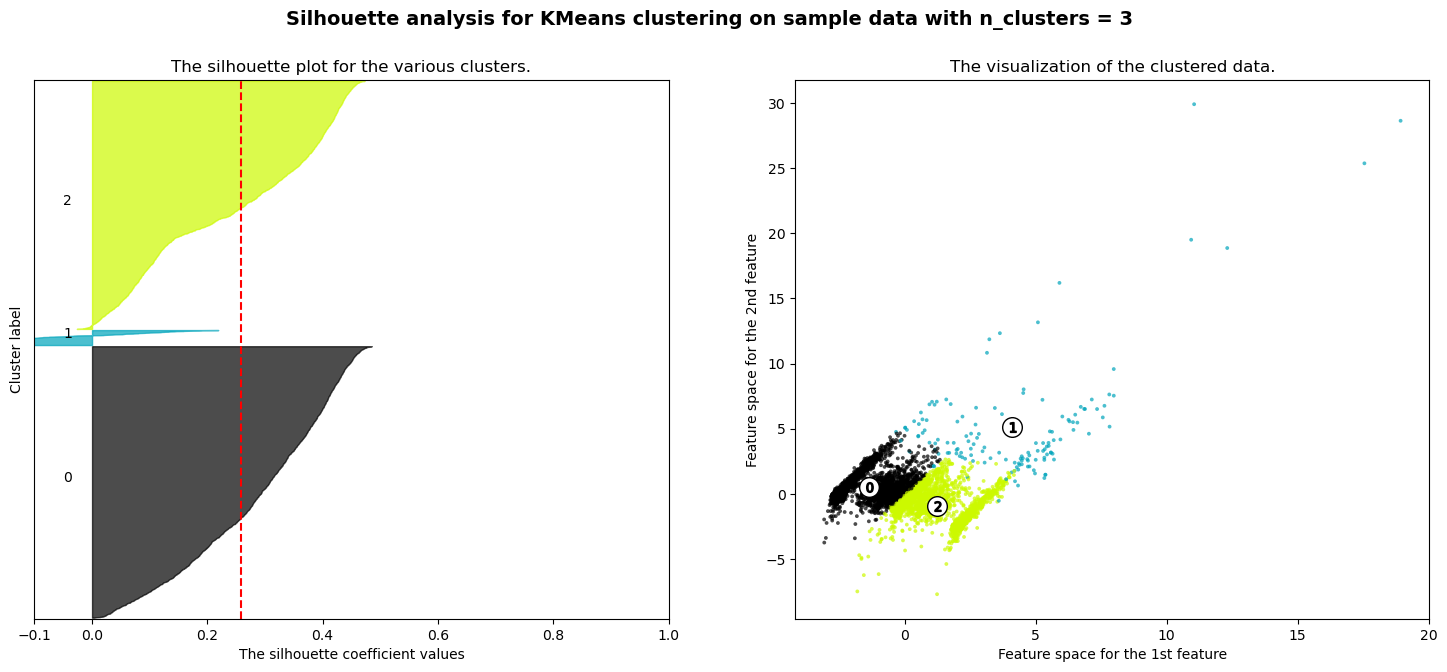

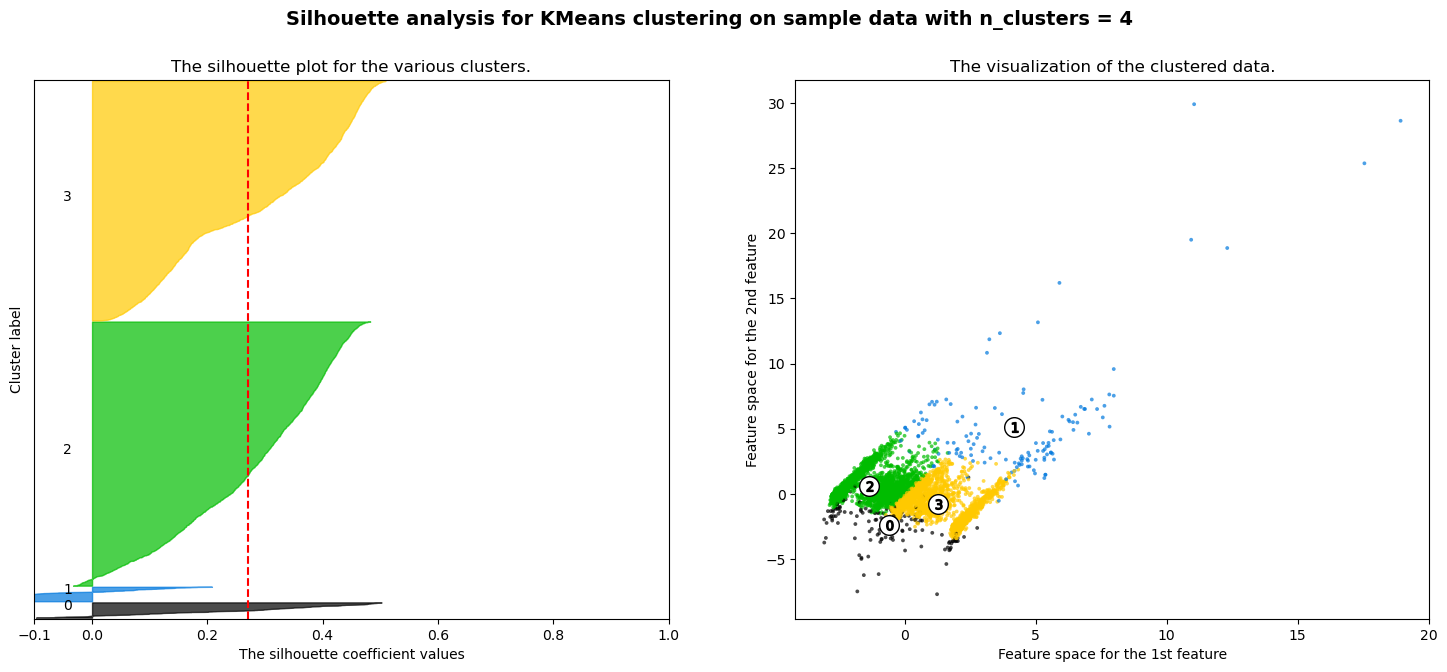

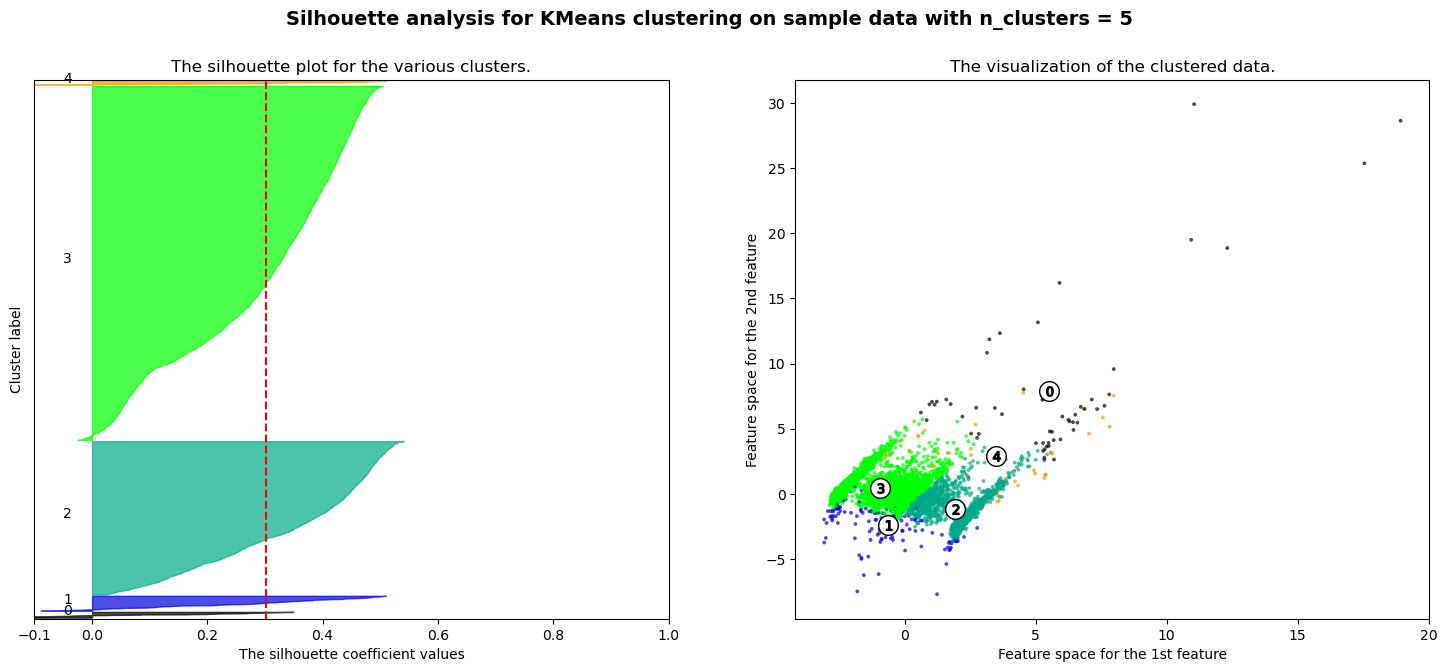

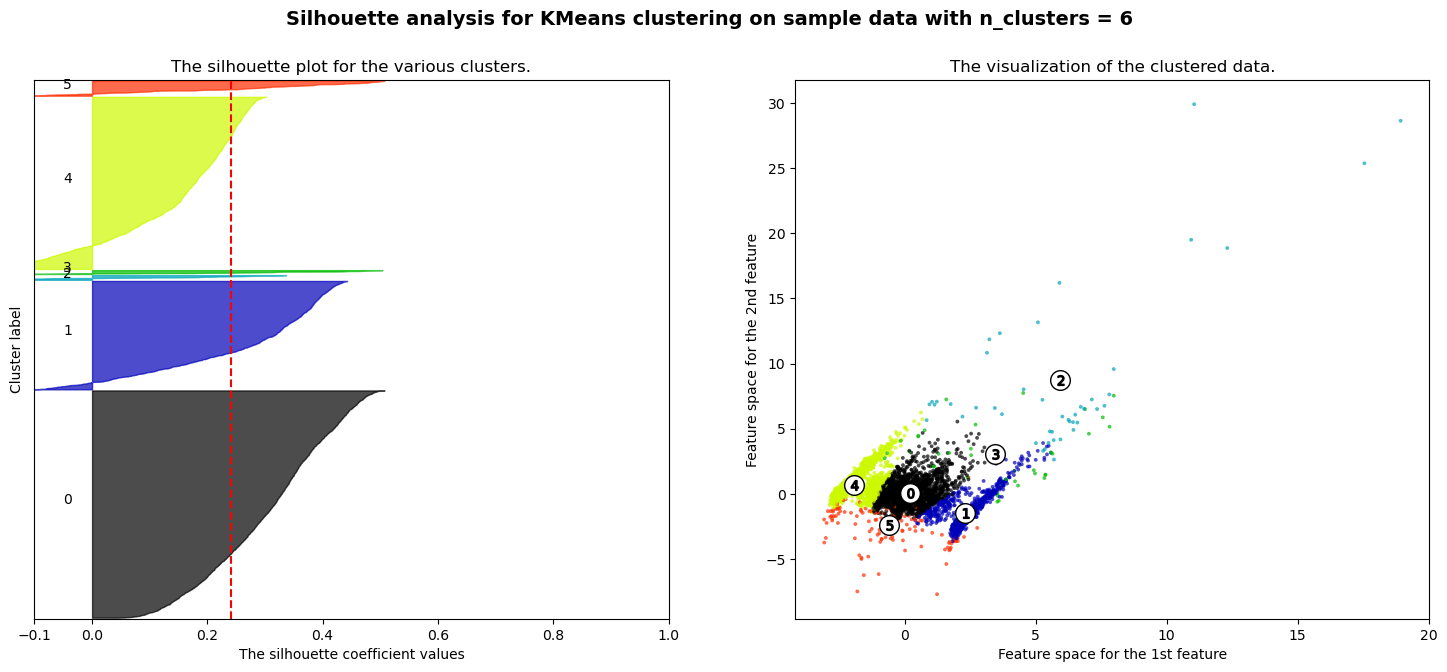

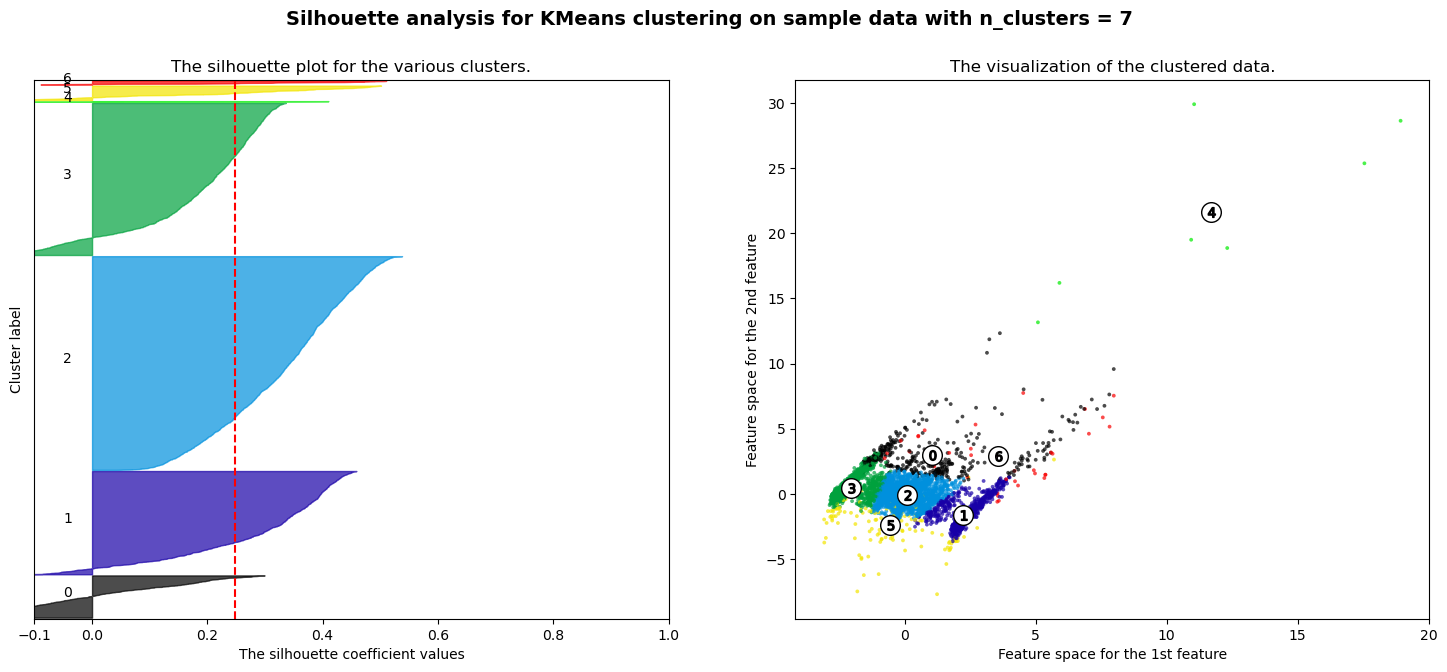

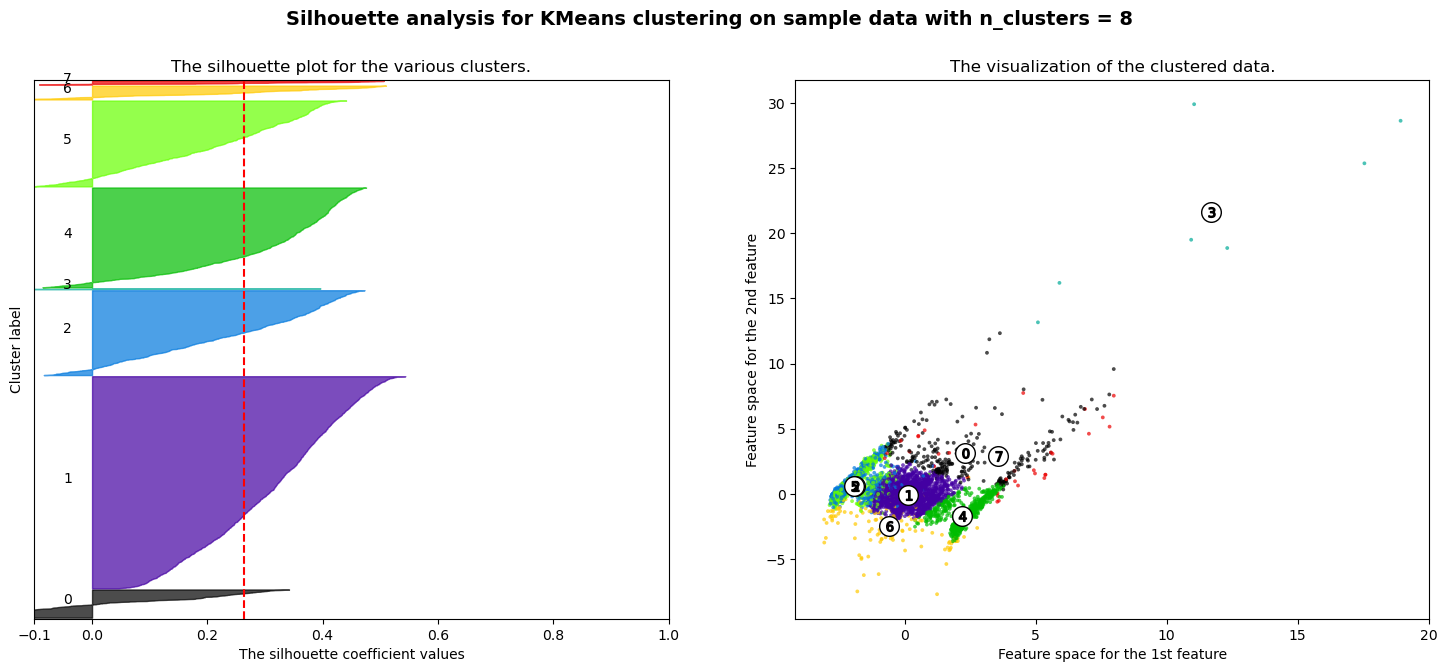

In [27]:
# YOUR CODE HERE
visualize_silhouette(8, X_reduced)

6. Instantiate a k-means model using the number of cluster that you deem optimal, assign it to `km`, and fit on the reduced data. 

In [28]:
# YOUR CODE HERE
km = KMeans(n_clusters=5)
km.fit(X_reduced)

KMeans(n_clusters=5)

7. What is the size of each cluster? 

In [46]:
# YOUR CODE HERE
cluster_labels = km.labels_
print(f"Size of clusters: {[len(cluster_labels[cluster_labels == l]) for l in range(0, 5)]}")

Size of clusters: [2493, 2274, 52, 37, 144]


8. Create a new column called `cluster_pca` in `past`, with values as predicted cluster index predicted by `km`. 

In [47]:
# YOUR CODE HERE
past['cluster_pca'] = cluster_labels

In [49]:
past.head()

,product_id,user_id,NumOfEventsInJourney,NumSessions,interactionTime,maxPrice,minPrice,NumCart,NumView,NumRemove,...,Afternoon,Dawn,EarlyMorning,Evening,Morning,Night,Purchased?,Noon,Category,cluster_pca
0,5866936,5.618978e+08,1.333333,1.333333,5550.000,15.84000,15.84000,0.00,1.333333,0.00,...,0.000,0.0,0.666667,0.333333,0.00,0.00,0,0.00,1.0,1
1,5647110,5.326529e+08,2.250000,1.500000,27556.500,5.80000,5.56500,1.25,0.250000,0.25,...,0.750,0.0,0.000000,0.250000,0.00,0.00,0,0.00,1.0,1
2,5790472,4.578109e+08,1.000000,1.000000,0.000,6.27250,6.27250,0.25,0.750000,0.00,...,0.000,0.0,0.000000,0.750000,0.25,0.00,0,0.00,1.0,1
3,5811598,4.612641e+08,1.500000,1.500000,131532.500,5.56000,5.56000,0.25,1.000000,0.25,...,0.000,0.0,0.000000,0.500000,0.00,0.25,0,0.25,1.0,1
4,5846363,5.157993e+08,1.875000,1.375000,11055.875,4.08625,4.08625,0.50,1.000000,0.25,...,0.375,0.0,0.125000,0.250000,0.25,0.00,1,0.00,1.0,0


9. Open ended: manipulate `past` and see if you can characterize each cluster (e.g., calculate statistics of / visualize features for each cluster), how will you intepret the results? 

    **Note**. This is probably the most important part as far as the business stakeholders are concerned: "*What can I do with your results?*" The math, modeling part is relatively easy, compared to actionable recommendations you make for business. Thus, before jumping on a different algorithm for the given task, do you best to 1) understand the data in depth 2) keep buisiness use cases in mind throughout all steps. 

    Let's group by cluster, and get the average cluster value for each feature of interest:

In [54]:
past.groupby('cluster_pca')[['NumOfEventsInJourney', 'NumSessions', 'interactionTime', 'maxPrice', 'minPrice', 'NumCart', 'NumView',
'NumRemove', 'InsessionCart', 'InsessionView', 'InsessionRemove',
'Weekend', 'Fr', 'Mon', 'Sat', 'Sun', 'Thu', 'Tue', 'Wed', '2019',
'2020', 'Jan', 'Feb', 'Oct', 'Nov', 'Dec', 'Purchased?', 'Category']].mean()

,NumOfEventsInJourney,NumSessions,interactionTime,maxPrice,minPrice,NumCart,NumView,NumRemove,InsessionCart,InsessionView,...,Wed,2019,2020,Jan,Feb,Oct,Nov,Dec,Purchased?,Category
cluster_pca,,,,,,,,,,,,,,,,,,,,,
0,1.902397,1.292603,1.904583e+05,5.575535,5.553941,0.544254,0.844574,0.408056,18.823782,14.826417,...,0.154382,0.855310,0.144690,0.071946,0.072745,0.292938,0.320906,0.241465,0.354593,1.133477
1,1.867660,1.289633,2.382501e+05,6.314741,6.285280,0.524203,0.859385,0.383846,19.777693,14.648378,...,0.155238,0.273761,0.726239,0.340047,0.386192,0.089299,0.091073,0.093389,0.337291,1.125981
2,8.862821,4.951282,3.460304e+06,5.892324,5.644915,2.013919,4.205998,2.391346,37.966987,25.656090,...,0.149451,0.321520,0.678480,0.398077,0.280403,0.132051,0.089927,0.099542,0.115385,2.432463
3,2.614865,1.468468,9.437101e+05,4.768063,4.343108,1.051802,0.382883,1.171171,560.833333,138.114865,...,0.164414,0.355856,0.644144,0.220721,0.423423,0.054054,0.202703,0.099099,0.054054,1.477477
4,1.444795,1.169272,9.493558e+04,59.344815,59.296325,0.119847,1.220769,0.070317,2.941660,6.037837,...,0.134231,0.566814,0.433186,0.218467,0.214719,0.230935,0.152057,0.183822,0.416667,1.050316


Some interesting results:
- Cluster #2 has significantly more `NumOfEventsInJourney`, `NumSessions`, and `NumCart` than any other cluster
- Cluster #4 has a significantly higher `maxPrice` and `minPrice` than any other cluster, and on average, they are more likely to purchase (mean `Purchased?` column value is 0.42)

10. What are the assumptions for k-means? Judging by the cluster sizes, is k-means a good approach? 

    Scanning the list of [clustering algorithms](https://scikit-learn.org/stable/modules/clustering.html) implemented in scikit-learn, try at least one other algorithm, examine its assumptions, and intepret results.

    The K-means algorithm assumes that clusters are convex and isotropic, which isn't always true for a given situation (e.g., elongated clusters).

    Next, I'm going to try Wand hierarchical clustering, which is ideal for cases where there are many clusters and many samples. It produces a hierarchy of clusters that can be represented as a tree (or dendrogram).

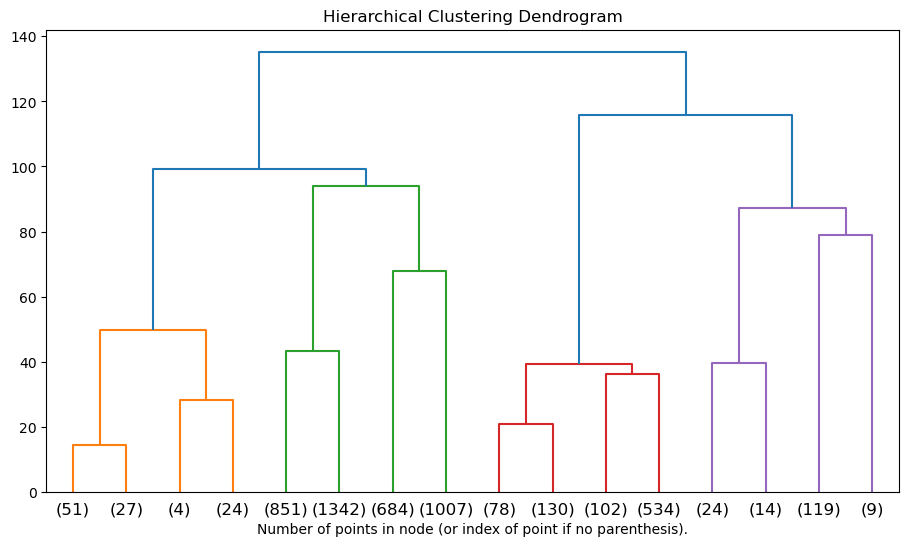

In [63]:
# YOUR CODE HERE
from sklearn.cluster import AgglomerativeClustering

clustering = AgglomerativeClustering(affinity='euclidean', linkage='ward', distance_threshold=0, n_clusters=None).fit(X_reduced)
ward_labels = clustering.labels_

# From https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_dendrogram.html#sphx-glr-auto-examples-cluster-plot-agglomerative-dendrogram-py
from scipy.cluster.hierarchy import dendrogram
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

fig, ax = plt.subplots(figsize=(11, 6))
plt.title("Hierarchical Clustering Dendrogram")
plot_dendrogram(clustering, truncate_mode="level", p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

11. Jot down recommendations or followup steps, detailing the reasons.

    I am not sure that Ward hierarchical clustering is a good strategy since it's intended for use cases with many clusters.

## Task 3. To launch or not to launch?

In this task, we will work on a hypothetical application: cosmetics purchase prediction for new products with limited features. The intention here is to maximize **recall** so that no popular cosmetic is understocked. Overstocking is less of a concern since it will not cause disengagement in customers.

The purchase status for each "new" product is known, but we only use the labels for benchmarking purpose. Instead, we use label spreading method to leverage a small amount of labeled data in combination with a larger amount of unlabeled data. 

1. Read in the data in `new.csv.gz` and save it as a `pd.DataFrame` named `new`. This is the test dataset.

    Look at the shape of `new` and inspect the frist few rows.

In [64]:
# YOUR CODE HERE
new = pd.read_csv('../dat/new.csv.gz')
new.shape

(30091, 5)

In [65]:
assert new.shape == (30091, 5)

In [66]:
new.head()

,product_id,maxPrice,minPrice,Purchased?,Category
0,5866502,7.616667,7.616667,0,1.0
1,5870408,6.270000,6.270000,0,3.0
2,5900580,10.008000,10.008000,0,1.0
3,5918778,5.980000,5.980000,0,2.5
4,5848772,26.830000,26.830000,0,1.0


2. How does the number of data points in the training set (`past`) compare to the number of datapoints in the test set (`new`)? 

    And how does the feature set in the training set compare to the feature set in the test set?

    The number of datapoints in the training set is relatively small while the test set is quite large. The training set has more features than in the test set.

3. Are there any product ids in both the training and test datasets? Hint: use `np.intersect1d` or set operations.

In [78]:
# YOUR CODE HERE
idx_past = pd.Index(past['product_id'].values)
idx_new = pd.Index(new['product_id'].values)
idx_past.intersection(idx_new)

Int64Index([], dtype='int64')

4. What percentage of data points resulted in a purchase in the test set?

    In reality, we won't be able to calculate information that is not available to you. Here, we simply demonstrated that the distributions in target between `past` and `new` are similar. 

In [81]:
# YOUR CODE HERE # ~.344
print(f"{len(new[new['Purchased?'] == 1]) / len(new) * 100:.2f}% of products are purchased")

34.43% of products are purchased


5. Create `ndarray`s: `X_train`, `y_train`, `X_test`, and `y_test` according to the following guidelines.

    - The `Purchased?` column is the target.
    - `X_train` and `X_test` should contain the same features
    - `product_id` should not be a feature.

    Double check that the shapes of the four arrays are what you expect.

In [90]:
# YOUR CODE HERE
X = new.drop(labels=['product_id'], axis=1)
y = X.pop('Purchased?')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train = X_train.to_numpy()
y_train = y_train.to_numpy()

In [91]:
assert X_train.shape[0] == y_train.shape[0] # 5000
assert X_train.shape[1] == X_test.shape[1]  # 3

assert type(X_train) == np.ndarray # make sure you import numpy as np at this point
assert type(X_train).__module__ == type(y_train).__module__ == np.__name__  # alternative way

6. Let's fit a simple logistic regression on the training set (`X_train`, `y_train`) and report performance on the test set (`X_test`, `y_test`).

In [92]:
# YOUR CODE HERE
lr = LogisticRegression(class_weight='balanced').fit(X_train, y_train)
print(classification_report(y_test, lr.predict(X_test)))

              precision    recall  f1-score   support

           0       0.78      0.94      0.85      3986
           1       0.80      0.50      0.61      2033

    accuracy                           0.79      6019
   macro avg       0.79      0.72      0.73      6019
weighted avg       0.79      0.79      0.77      6019



/usr/local/Caskroom/miniconda/base/envs/fbenv/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


7. Re-assemble data for semi-supervised learning. 
    - Use the features from the test set along with the features from the training set. 
    - Only use the labels from the training set but none from the test set.  
    
    Since we're using a large number of sampled features, but only a small number of these samples have labels, this is **semi-supervised learning**.

Create a matrix `X` that has the rows from `X_train` concatenated with the rows from `X_test`. Check the shape of the matrix.

In [98]:
# YOUR CODE HERE
X = np.concatenate([X_train, X_test])

In [100]:
assert X.shape == (30091, 3)

Create the target array `y` by concatenating `y_train` with a vector of -1's, effectively creating a dummy label for the `X_test` rows in `X`. Check the shape of the array. It should have as many values as `X` has rows.

In [101]:
# YOUR CODE HERE
y = np.concatenate([y_train, np.ones(y_test.shape) * -1])

In [102]:
assert X.shape[0] == y.shape[0]

8. Semi-supervised learning. 

    Scikit-learn provides two label propagation models: [`LabelPropagation`](https://scikit-learn.org/stable/modules/generated/sklearn.semi_supervised.LabelPropagation.html) and [`LabelSpreading`](https://scikit-learn.org/stable/modules/generated/sklearn.semi_supervised.LabelSpreading.html). Both work by constructing a similarity graph over all items in the input dataset. `LabelSpreading` is similar to the basic Label Propagation algorithm, but it uses an affinity matrix based on the normalized graph Laplacian and soft clamping across the labels; thus more robust to noise. We will be using scikit-learn's `LabelSpreading` model with `kNN`.
    
    Train a `LabelSpreading` model. Set `kernel` to `knn` and `alpha` to 0.01.

In [105]:
# YOUR CODE HERE
from sklearn.semi_supervised import LabelSpreading
label_spread_model = LabelSpreading(kernel='knn', alpha=0.01).fit(X, y)

9. Extract the predictions for the test data. 

    You can get the predictions from the `transduction_` attribute. Note that there is a value for every row in `X`, so select just the values that correspond to `X_test`.

In [118]:
preds_all = label_spread_model.transduction_
semi_sup_preds = preds_all[X_train.shape[0]:] # YOUR CODE HERE

In [119]:
assert semi_sup_preds.shape[0] == X_test.shape[0]

10. Print the classification report

In [120]:
print(classification_report(y_test, semi_sup_preds)) # make sure you properly import classification_report

              precision    recall  f1-score   support

           0       0.86      0.94      0.89      3986
           1       0.85      0.69      0.76      2033

    accuracy                           0.85      6019
   macro avg       0.85      0.81      0.83      6019
weighted avg       0.85      0.85      0.85      6019



Let's bring the performance from the supervised learning model down to see the comparison; discuss the areas of improvement and reasons for improvement.

In [114]:
print(classification_report(y_test, lr.predict(X_test)))

              precision    recall  f1-score   support

           0       0.78      0.94      0.85      3986
           1       0.80      0.50      0.61      2033

    accuracy                           0.79      6019
   macro avg       0.79      0.72      0.73      6019
weighted avg       0.79      0.79      0.77      6019



/usr/local/Caskroom/miniconda/base/envs/fbenv/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


    Note that class 1 has significantly improved by using the semi-supervised model.

11. Read [Small Data Can Play a Big Role in AI](https://hbr.org/2020/02/small-data-can-play-a-big-role-in-ai) and discuss with your teammate about AI tools for training AI with small data and their use cases. 

## Acknowledgement & References

- data was adapted from Kaggle: [eCommerce Events History in Cosmetics Shop](https://www.kaggle.com/mkechinov/ecommerce-events-history-in-cosmetics-shop)
- function `visualize_silhouette` was adapted from [plot_kmeans_silhouette_analysis by scikit-learn](https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html)
- [Categorizing Online Shopping Behavior from Cosmetics to Electronics: An Analytical Framework](https://arxiv.org/pdf/2010.02503.pdf)
- [OPAM: Online Purchasing-behavior Analysis using Machine learning](https://arxiv.org/pdf/2102.01625.pdf)